# 6 Дерево решений #

In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:

df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [64]:
#проверим, есть ли пропуски
df.isnull().sum(axis = 0).to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: int64)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [66]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
columns = ['state', 'international plan', 'voice mail plan', 'churn', 'phone number']
for column in columns:
    df[column] = lab.fit_transform(df[column])
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,3057,0,1,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,1528,0,0,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,42,0,0,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1331,1,0,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   int32  
 4   international plan      3333 non-null   int32  
 5   voice mail plan         3333 non-null   int32  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

<AxesSubplot:>

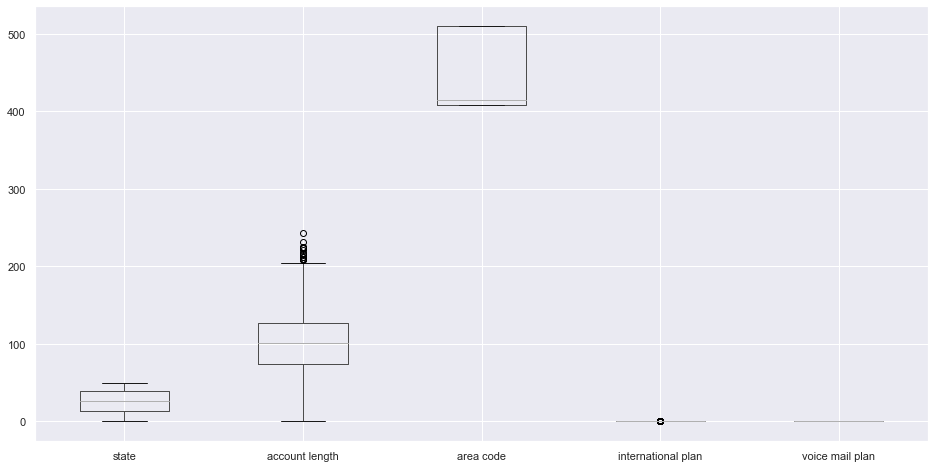

In [68]:
df.boxplot(['state', 'account length', 'area code', 'international plan', 'voice mail plan'], figsize = (16, 8))

<AxesSubplot:>

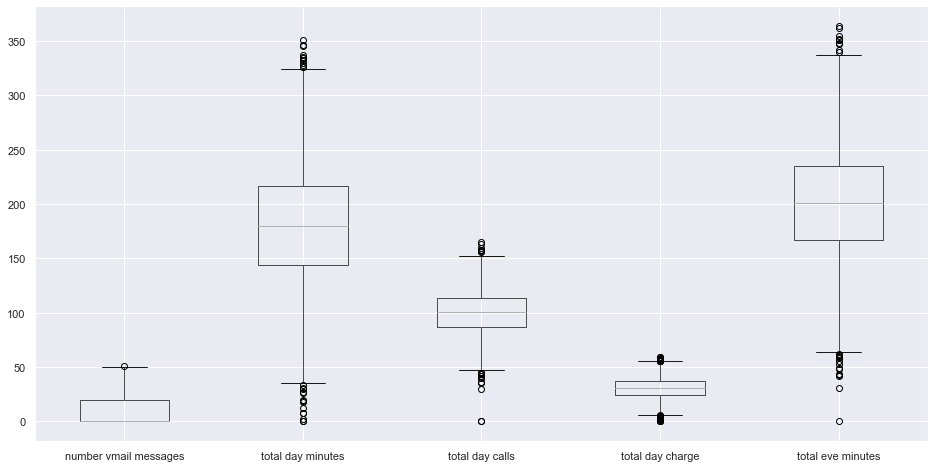

In [69]:
df.boxplot(['number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes'], figsize = (16, 8))

<AxesSubplot:>

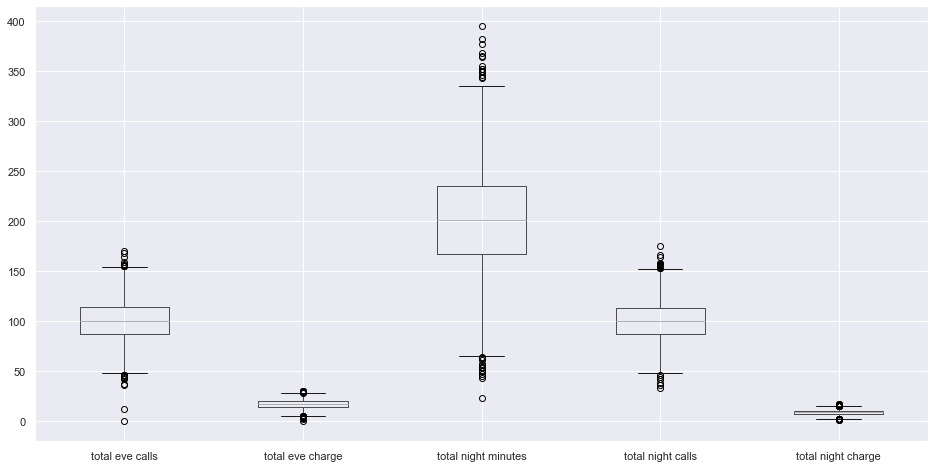

In [70]:
df.boxplot(['total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge'], figsize = (16, 8))

<AxesSubplot:>

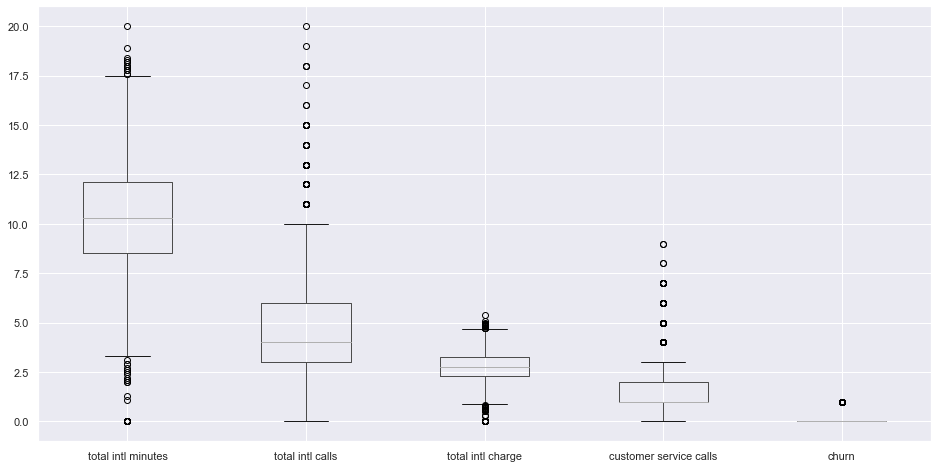

In [71]:
df.boxplot(['total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn'], figsize = (16, 8))

In [72]:
columns_check = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 
                 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 
                 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

for column in columns_check:
       for x in [column]:
              q75,q25 = np.percentile(df.loc[:,x],[75,25])
              dif = q75-q25

              max = q75 + (1.5 * dif)
              min = q25 - (1.5 * dif)

              df.loc[df[x] < min, x] = np.nan
              df.loc[df[x] > max, x] = np.nan
    
df.isnull().sum()

state                       0
account length             18
area code                   0
phone number                0
international plan          0
voice mail plan             0
number vmail messages       1
total day minutes          25
total day calls            23
total day charge           25
total eve minutes          24
total eve calls            20
total eve charge           24
total night minutes        30
total night calls          22
total night charge         30
total intl minutes         46
total intl calls           78
total intl charge          49
customer service calls    267
churn                       0
dtype: int64

In [73]:
df = df.dropna(axis = 0)
df.isnull().sum().to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: int64)

<AxesSubplot:>

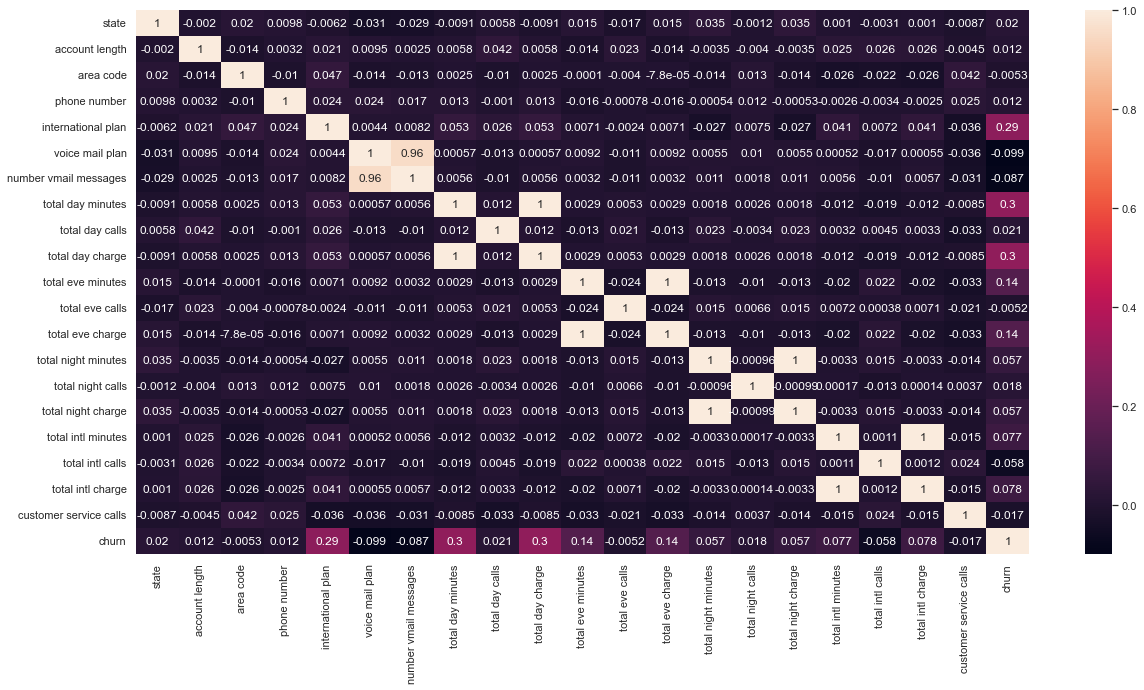

In [74]:
# проверим зависимости с помощью коррелированной матрицы
corr_matrix = df.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr_matrix, annot=True)

In [75]:
X = df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'churn'], axis = 1)
y = df['churn']

<AxesSubplot:>

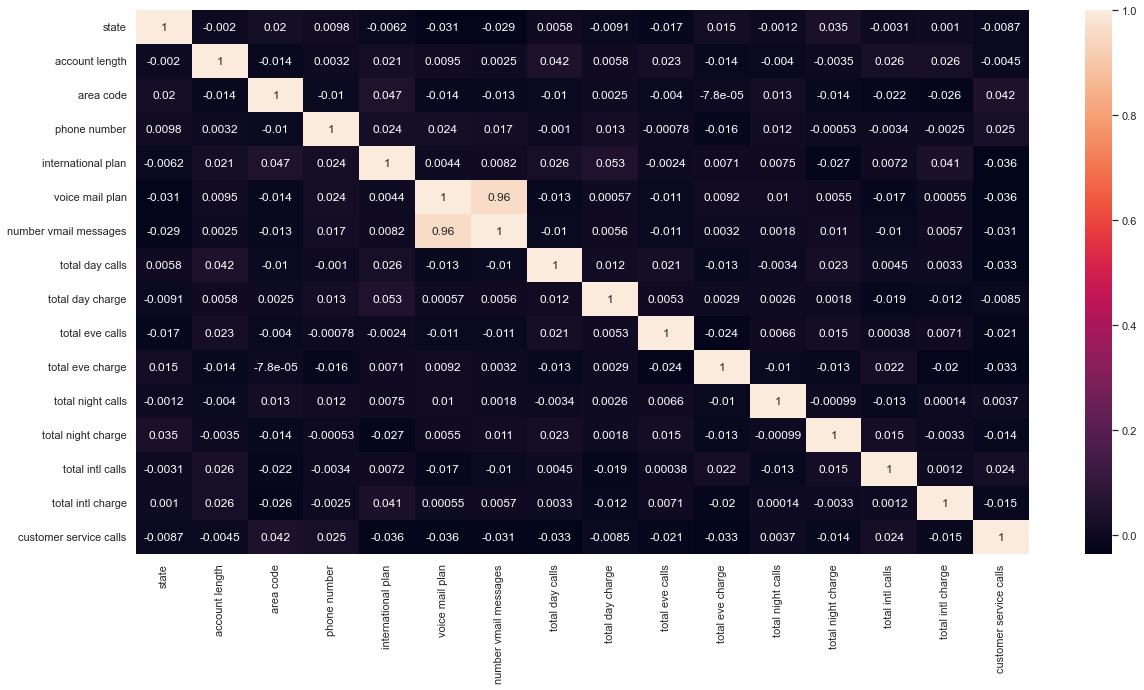

In [76]:
# проверим зависимости с помощью коррелированной матрицы
corr_matrix = X.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr_matrix, annot=True)

In [77]:
df = df.rename(lambda e : str.replace(e, " ", "_"), axis='columns')

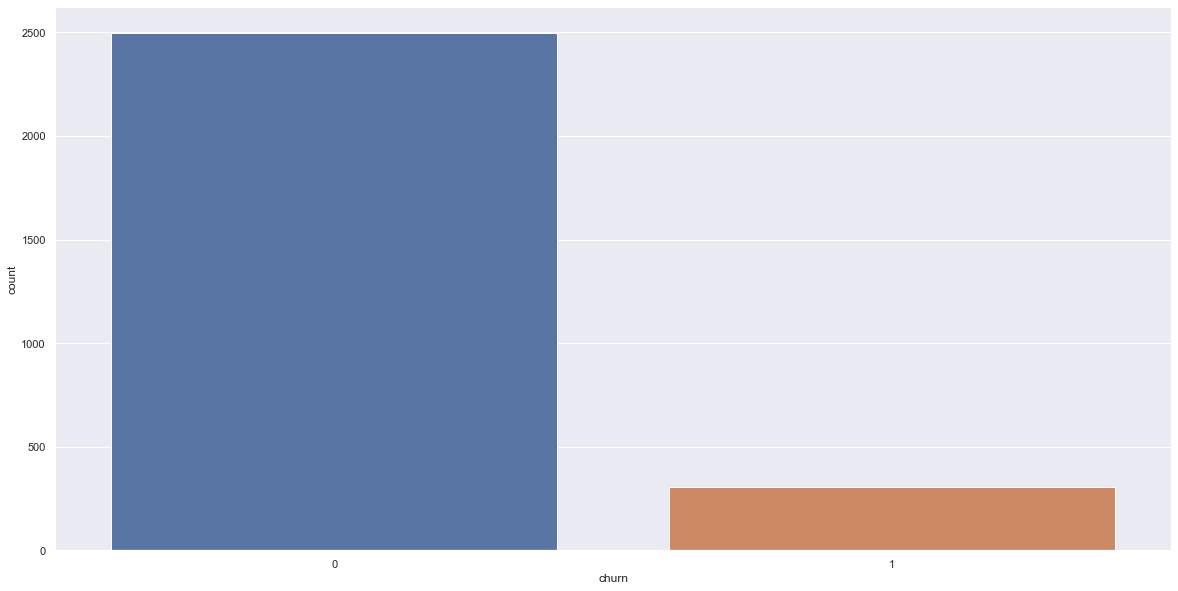

In [78]:
ax1 = sns.countplot(x='churn',  data = df)
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(1962, 16)
(1962,)

(842, 16)
(842,)


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
dtc_tree.fit(X_train, y_train)
dtc_tree.score(X_test, y_test)

0.9406175771971497

[Text(0.5, 0.875, 'X[8] <= 44.975\ngini = 0.198\nsamples = 1962\nvalue = [1743, 219]'),
 Text(0.25, 0.625, 'X[4] <= 0.5\ngini = 0.144\nsamples = 1843\nvalue = [1699, 144]'),
 Text(0.125, 0.375, 'X[8] <= 37.95\ngini = 0.103\nsamples = 1689\nvalue = [1597, 92]'),
 Text(0.0625, 0.125, 'gini = 0.057\nsamples = 1429\nvalue = [1387, 42]'),
 Text(0.1875, 0.125, 'gini = 0.311\nsamples = 260\nvalue = [210, 50]'),
 Text(0.375, 0.375, 'X[13] <= 2.5\ngini = 0.447\nsamples = 154\nvalue = [102, 52]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.4375, 0.125, 'gini = 0.316\nsamples = 127\nvalue = [102, 25]'),
 Text(0.75, 0.625, 'X[6] <= 9.5\ngini = 0.466\nsamples = 119\nvalue = [44, 75]'),
 Text(0.625, 0.375, 'X[10] <= 15.765\ngini = 0.33\nsamples = 91\nvalue = [19, 72]'),
 Text(0.5625, 0.125, 'gini = 0.497\nsamples = 28\nvalue = [15, 13]'),
 Text(0.6875, 0.125, 'gini = 0.119\nsamples = 63\nvalue = [4, 59]'),
 Text(0.875, 0.375, 'X[4] <= 0.5\ngini = 0.191\nsamples = 28\n

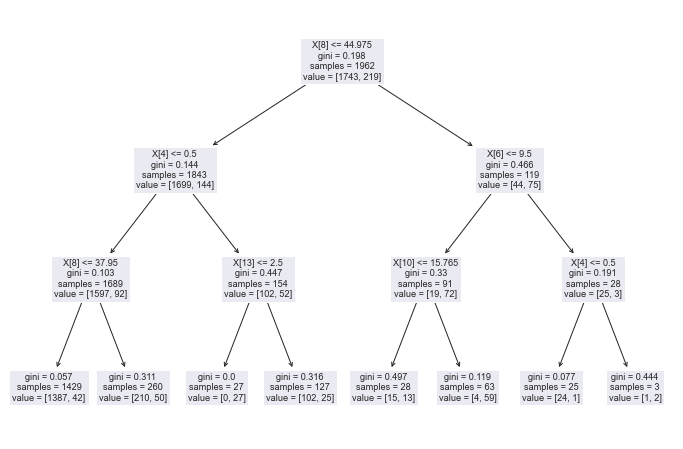

In [82]:
plt.figure(figsize =(12,8))
tree.plot_tree(dtc_tree.fit(X_train, y_train))

In [83]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

dtc_pred = dtc_tree.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, dtc_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, dtc_pred))
print('Mean Squared Error:', mean_squared_error(y_test, dtc_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, dtc_pred)))

Accuracy:  0.9406175771971497
Mean Absolute Error: 0.05938242280285035
Mean Squared Error: 0.05938242280285035
Root Mean Squared Error: 0.24368508941428968


In [84]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_depth = 3, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=1000, random_state=42)

In [85]:
# Use the forest's predict method on the test data
pred = rf.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.11256064904224566
Mean Squared Error: 0.04345054003404989
Root Mean Squared Error: 0.20844793122995942


In [86]:
# для определения класса по самому распространнёному значению
def classify(data):
    label = data[:,-1]
    unique_classes,unique_count = np.unique(label,return_counts=True) #уникальны ли? какие - сколько

    class_index = unique_count.argmax() #выясняет чего больше - 0 или 1, выдает индекс
    classification = unique_classes[class_index] #класс/число
    
    return classification

# gini
def calculate_gini(data,label):
    y = data[:,-1]
    _,counts = np.unique(label,return_counts=True)
    branch_size = float(len(label))
    probabilities = counts/branch_size
    ginis = 1 - sum (probabilities * probabilities)
    ginis = branch_size * ginis / len(y)
    return ginis

# разбиение данных
def split_data(data,split_column,split_value):
    column_values = data[:,split_column]

    type_of_feature = FEATURE_TYPES[split_column]#определяет тип столбца категориальный или численный
    #разделяем значения на меньшие и большие
    if type_of_feature == "continuous":
        left_dataset = data[column_values <= split_value]
        right_dataset = data[column_values > split_value]
    else:
        left_dataset = data[column_values == split_value]
        right_dataset = data[column_values != split_value]
    return left_dataset, right_dataset

# формируем массив из столбцы для поиска лучшего разбиения
def all_potential_splits(data):
    # 
    potential_splits ={}         
    n_row , n_col = data.shape
    # 3   На этом шаге мы выполняем итерацию по каждому столбцу в наборе данных, определяя уникальные значения и
    # сохранение значений в нашем массиве с этим индексом столбца 
    for col_index in range(n_col -1):
        values = data[:,col_index]
        unique_values = np.unique(values)    
        potential_splits[col_index] = unique_values
    return potential_splits

# выбираем лучший столбец для разбиения
#при построении дерева для ветвления нужно брать признак с минимальным значением Gini.
def best_split(data,potential_splits):
    y = data[:,-1]
    num_features = X.shape[1]
    num_rows = len(y)
    best_split_feature = 0
    best_split_value = 0
    best_score = np.inf

    for index in potential_splits:
        for value in potential_splits[index]:
            #split data for specific value and feature
            right_data, left_data = split_data(data, index, value)
            right_labels =right_data[:,-1]
            left_labels = left_data[:,-1]
            #calc score (check if the split was good)
            score = 0
            for subtree in [right_labels, left_labels]:
                score += calculate_gini(data,subtree)

            if score < best_score:
                best_score = score
                best_split_feature, best_split_value = index, value

    return best_split_feature, best_split_value
#определяет тип столбца категориальный или численный
def determine_type_of_feature(df,n_unique_values_treshold = 10):    
    feature_types = []
    
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types
# проверка на то что в последнем столбце есть разные значения
def check_purity(data):
    label = data[:,-1]
    unique_classes,unique_class_count = np.unique(label,return_counts=True)

    if len(unique_classes) == 1:
        return True
    else:
        return False   



def build_tree(df,min_samples=3,counter=0,max_depth=3):
#     предподготовка
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns #запоминаем столбцы
        FEATURE_TYPES = determine_type_of_feature(df) #и типы столбцов
        data = df.values# и значения столбцов
    else:
        data = df           
    
    # если состоит из значений 1 класса или достигли максимальной глубины или минимального числа объектов в листе
    if check_purity(data) or (len(data) < min_samples) or (counter == max_depth):
        # то классифицируем лист
        classification =  classify(data)
        return classification
    # иначе
    else:
        counter += 1
        # добавляем к глубине, среди потенциальных находим лучший столбец для разбиения
        potential_splits = all_potential_splits(data)
        split_column,split_value = best_split(data,potential_splits)
        # разбиваем
        left_dataset, right_dataset = split_data(data,split_column,split_value)
        
        # если длина одного из поддеревьев ==0 , то классифицируем
        if len(left_dataset) == 0 or len(right_dataset) == 0:
            classification = classify(data)
            return classification
        # для записи используем формат
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            # для числовых
            question = "{} <= {}".format(feature_name, split_value)
            
        else:
            # для котегориальных
            question = "{} = {}".format(feature_name, split_value)
        # дерево будет состоять из  таких записей     
        tree = {question: []}
        # строим дерево от левого потомка
        yes_answer = build_tree(left_dataset,min_samples,counter,max_depth)
        # строим дерево от правого 
        no_answer = build_tree(right_dataset,min_samples,counter,max_depth)
        # если они равны, то дерево построено возвращаем одно из них
        if yes_answer == no_answer:
            tree = yes_answer 
        else:
            # иначе добавляем к дереву оба оба
            tree[question].append(yes_answer)
            tree[question].append(no_answer)
        return tree
    
#  функция вызывающая сборку дерева   
def fit(train_data,train_label):
    train_data["label"] = train_label
    tree = build_tree(train_data)
    return tree

In [87]:
tree = fit(X,y)

In [88]:
# функции для проверки и оценки
def classify_example(test, tree):
    question = list(tree.keys())[0]
    # берем дерево и разбиваем в его записи на отдельные значения
    feature_name, comparison_operator, value = question.split(" ")
    # если на данном этапе производилось разбиение по числовому признаку
    if comparison_operator == "<=":#         то берем из тестовой выборки и распределяем значения
        if test[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    # если по категориальному
    else:
        # то берем из тестовой выборки и распределяем значения
        if str(test[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    # если не принадлежит экземпляр к классу, то мы закончили возвращаем ответ
    if not isinstance(answer, dict):
        return answer
    # иначе продолжаем рекурсивно
    else:
        residual_tree = answer
        return classify_example(test, residual_tree)

def predict(test,tree):
    output = []
    index = test.index.tolist()
    for i in index:
        output.append(classify_example(test.loc[i],tree))
    return output


In [89]:
tree

{'total day charge <= 44.95': [{'international plan = 0.0': [0.0,
    {'total intl charge <= 3.51': [0.0, 1.0]}]},
  {'voice mail plan = 0.0': [{'total eve charge <= 15.94': [0.0, 1.0]}, 0.0]}]}